In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os

In [2]:
#method used in order to get all the frames from one video
def get_frames(video_path):
    images = []
    cap = cv.VideoCapture(video_path)
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == True:
            images.append(frame)
        else:
            break
    cap.release()
    return images

656 235 32 40
284 231 32 41


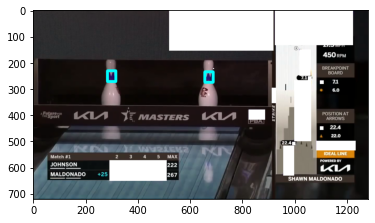

336 306 24 26
690 298 23 24


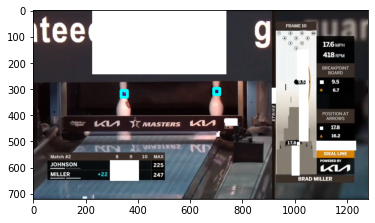

314 668 20 24
307 395 28 31
242 388 28 26
629 374 26 27


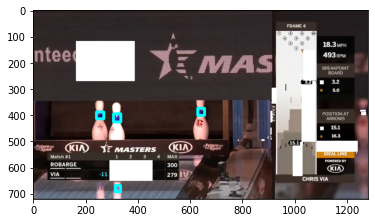

294 276 34 41
618 260 32 40


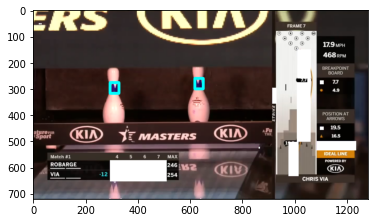

100 124 26 30


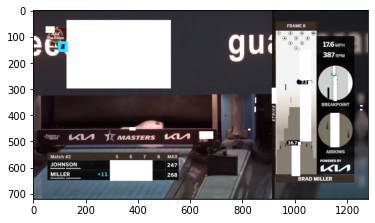

748 254 30 38


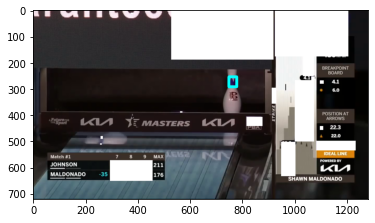

416 656 20 24
408 299 36 39
320 264 56 62
136 262 29 35
736 256 30 38


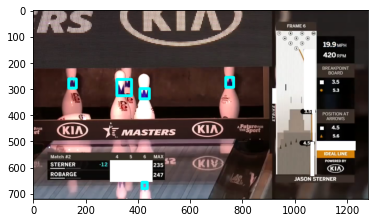

732 340 26 30
1194 338 26 30


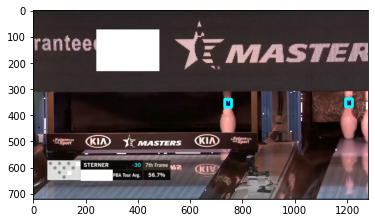

754 226 34 34


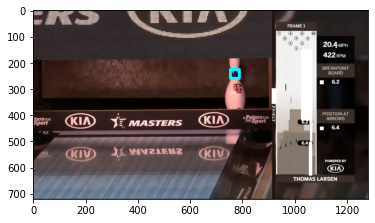

537 316 29 30


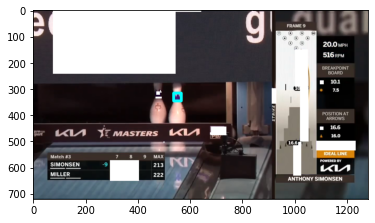

456 660 32 38
448 258 68 70


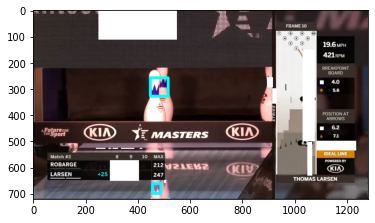

872 526 42 34
813 370 29 36
432 370 54 62


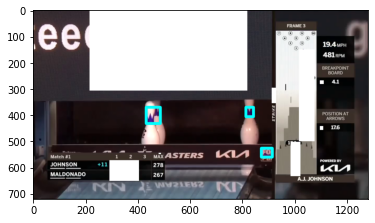

784 292 30 33
427 290 31 38


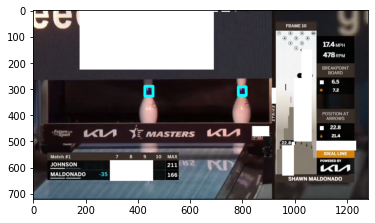

550 226 35 41
652 212 34 42
264 209 32 41
182 199 26 35


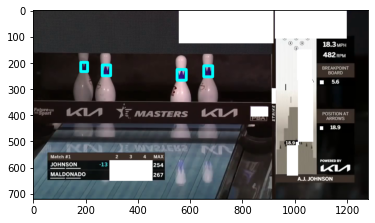

420 297 28 33
352 289 24 27
506 287 24 31


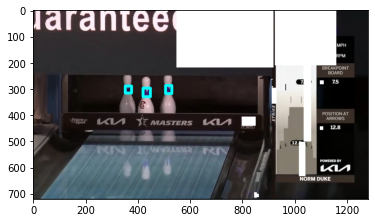

In [3]:
output = []
test_folder = '../test/Task3'

#iterate through all videos
for fname in os.listdir(test_folder):
    complete_filename = test_folder + '/' + fname
    if fname[-4:] == '.mp4':
        #for each video compute all its frames and select the last one
        frames = get_frames(complete_filename)
        last_frame = frames[-1]

        #select the red portions
        hsv = cv.cvtColor(last_frame, cv.COLOR_BGR2HSV)
        hsv_low = np.array([138, 83, 57], np.uint8)
        hsv_high = np.array([179, 255, 255], np.uint8)
        #mai modifica pt 06 si aia cu popice mai multe

        #get the mask and apply dilute
        mask = cv.inRange(hsv, hsv_low, hsv_high)
        kernal = np.ones((2, 2), np.uint8)
        dilation = cv.dilate(mask, kernal, iterations=2)
        contours, hierarchy = cv.findContours(dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        mask = cv.drawContours(mask, contours, -1, (255, 0, 0), 3)
        #eliminate the contours that contains red portions that are not on pins
        for c in contours:
            (x,y,w,h) = cv.boundingRect(c)
            if w < 100 and h < 100 and h > 20 and np.abs(w - h) < 10:
                pass
            else:
                #over the red part paint a white rectangle
                cv.rectangle(last_frame, (x,y), (x+w,y+h), (255, 255, 255), -1)


        #get the frame with red areas that are not pins removed
        new_img = last_frame
        hsv = cv.cvtColor(new_img, cv.COLOR_BGR2HSV)
        #apply hsv to get red regions
        hsv_low = np.array([138, 83, 57], np.uint8)
        hsv_high = np.array([179, 255, 255], np.uint8)
        mask = cv.inRange(hsv, hsv_low, hsv_high)

        #apply dilate using kernal
        kernal = np.ones((2, 2), np.uint8)
        dilation = cv.dilate(mask, kernal, iterations=2)
        contours, hierarchy = cv.findContours(dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        mask = cv.drawContours(mask, contours, -1, (255, 0, 0), 3)
        #number the remaining contours that represents the number of pins
        counter = 0
        for c in contours:
            (x,y,w,h) = cv.boundingRect(c)
            if w < 100 and h < 100 and h > 20 and np.abs(w - h) < 10:
                cv.rectangle(new_img, (x,y), (x+w,y+h), (0, 255, 255), 10)
                print(x,y,w,h)
                counter += 1
        output.append([fname, counter])

        plt.imshow(new_img)
        plt.show()

In [4]:
os.mkdir( '../submission_files/Task3')
base = '../submission_files/Task3'

#write the predicted
for line in output:
    file = line[0]
    number = line[1]

    #get path for predicted and write number of pins
    new_file = base + '/' + file[:-4] + '_predicted.txt'
    f = open(new_file, 'w')
    f.write(str(number))
    f.close()